In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
path2data="/Users/luizaadelinaciucu/Work/TrackML/"
df_hits=pd.read_csv(path2data+"event000021069-hits.csv")

In [31]:
df_truth=pd.read_csv(path2data+"event000021069-truth.csv")

In [32]:
df_particles=pd.read_csv(path2data+"event000021069-particles.csv")

In [13]:
from annoy import AnnoyIndex
import random

In [33]:
df_hits.head()


,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-96.0251,-11.043100,-1502.5,7,2,1
1,2,-57.1466,-5.425400,-1502.5,7,2,1
2,3,-83.1498,-9.277450,-1502.5,7,2,1
3,4,-70.7627,-11.261700,-1502.5,7,2,1
4,5,-73.3473,0.070458,-1502.5,7,2,1


In [34]:
df_truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [36]:
df_particles.tail()

,particle_id,particle_type,vx,vy,vz,px,py,pz,q,nhits
8998,806154435062398976,-211,-6.831540,1.08192,1936.68000,-0.103415,0.168966,2.378000,-1,0
8999,806156221768794112,211,-0.103468,1.57712,2.26373,0.058160,0.397066,1.795770,1,11
9000,806156290488270848,-211,-0.103468,1.57712,2.26373,-0.079124,-0.065656,0.726934,-1,1
9001,806158695669956608,-11,-0.003115,-0.00909,-9.81103,0.083837,0.219420,-0.923823,1,14
9002,806161856765886464,-211,2.447930,1.22514,-90.16350,0.071399,0.072703,-0.092650,-1,0


In [25]:
df_hits.shape

(95224, 7)

In [26]:
df_truth.shape

(95224, 9)

In [37]:
df_particles.shape

(9003, 10)

In [14]:
def buildAnnoyIndex(data,metric="angular",ntrees=10):
    f = len(data[0])
    t = AnnoyIndex(f,metric)  
    for i,d in enumerate(data):
        t.add_item(i, d)
    t.build(ntrees) # 10 trees
    return t

In [15]:
data=df[["x","y","z"]].values

index=buildAnnoyIndex(data,metric="angular",ntrees=10)


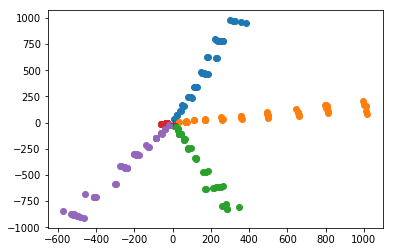

In [16]:
NB_BUCKET=5
for i in range(NB_BUCKET):
    n=random.choice(range(len(data)))
    
    bucket_idx=np.array(index.get_nns_by_item(n,50))
    bucket=df.iloc[bucket_idx]
    plt.plot(bucket.x,bucket.y,"o")
    plt.plot(0,0,"r+")
plt.show()